In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

# Présentation du data set

In [2]:
rawData = pd.read_csv("dataset/athlete_events.csv")

rawData.describe()

rawData.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Les variables


- ID : Identifiant unique pour chacun des athlètes
- Name : Nom de l'athlète
- Sex : Sexe de l'athlète (M ou F)
- Age : Age de l'athlète
- Height : Taille en centimètre de l'athlète
- Weight : Poids en kilogrammes de l'athlète
- Team : Nomm de l'équipe de l'athlète
- NOC : Identifiant en trois lettre des équipes
- Games : Année et saison des JO
- Year : Année de participation
- Season : "Summer" ou "Winter"
- City : Ville hôte
- Sport : Sport de l'épreuve
- Event : Nom e l'évènement
- Medal : Type de médaille remporté : Gold, Silver, Bronze, ou NA si rien n'a été gagné par l'athlète

### Variables utlisées dans le cadre de la résolution de la problématique
Les variables qui seront utlisées dans le cadre de la résolution de la problématique seront :
- Age
- Height
- Weight

Qui permettent de décrire physiquement l'athlète

- Sport

Pour catégoriser les athlètes

- Medal


Pour évaluer la réussite de l'athlète


### Descriptions graphiques des variables

#### Taille

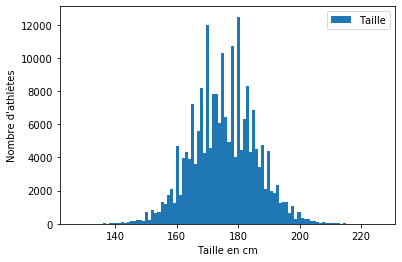

In [6]:
plt.hist(rawData["Height"], bins=100, label=['Taille'])
plt.legend(loc="upper right")
plt.xlabel('Taille en cm')
plt.ylabel("Nombre d'athlètes")
plt.show()

#### Poids

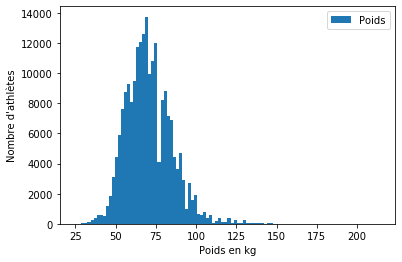

In [7]:
plt.hist(rawData["Weight"], bins=100, label=['Poids'])
plt.legend(loc="upper right")
plt.xlabel('Poids en kg')
plt.ylabel("Nombre d'athlètes")
plt.show()

#### Age

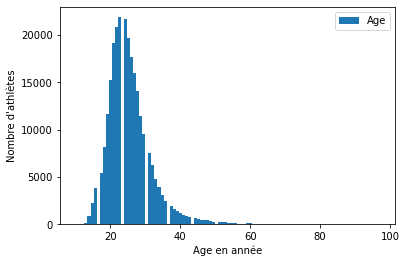

In [9]:
plt.hist(rawData["Age"], bins=100, label=['Age'])
plt.legend(loc="upper right")
plt.xlabel('Age en année')
plt.ylabel("Nombre d'athlètes")
plt.show()

# Préparation des données

Données qu'on considère comme ne pouvant pas être null à cause :

**Du non sens physique**
 - Age
 - Height
 - Weight
 - Sex


**Pour les besoins du process de traitement**
 - Sport

In [ ]:
rawData.isnull()

print("Taille pré nettoyage :" + str(len(rawData)))

# Suppression des colonnes inutiles
rawData = rawData.drop(["Name", "Team", "NOC", "Games", "Year", "Season", "City", "Event"], axis=1)

# Filtre sur les data null
clearData = rawData[(rawData["Height"].isnull() == False) & \
                    (rawData["Age"].isnull() == False) & \
                    (rawData["Weight"].isnull() == False) & \
                    (rawData["Sex"].isnull() == False) & \
                    (rawData["Sport"].isnull() == False)
                    ]
clearData = clearData.drop_duplicates()
print("Taille post nettoyage :" + str(len(clearData)))
print("Il y'a donc une perte de " + str(len(rawData) - len(clearData)))
clearData.head(15)

# Normalisation des données

## Normalisation de la taille

In [ ]:
#plt.hist(clearData["Height"], bins=100, label=['Taille'])
#plt.legend(loc="upper right")
#plt.show()

#normalisation de la taille 
clearData["Height"]=((clearData["Height"]-clearData["Height"].min())/(clearData["Height"].max()-clearData["Height"].min()))*1

#plt.hist(clearData["Height"], bins=100, label=['Taille'])
#plt.legend(loc="upper right")
#plt.show()

## Normalisation du poids

In [ ]:
plt.hist(clearData["Weight"], bins=100, label=['Poids'])
plt.legend(loc="upper right")
plt.show()

#normalisation du poids 
clearData["Weight"]=((clearData["Weight"]-clearData["Weight"].min())/(clearData["Weight"].max()-clearData["Weight"].min()))*1

#plt.hist(clearData["Weight"], bins=100, label=['Poids'])
#plt.legend(loc="upper right")
#plt.show()

## Normalisation de l'âge

In [1]:
plt.hist(clearData["Age"], bins=60, label=['Age'])
plt.legend(loc="upper right")
plt.show()

#normalisation de l'age 
clearData["Age"]=((clearData["Age"]-clearData["Age"].min())/(clearData["Age"].max()-clearData["Age"].min()))*1

#plt.hist(clearData["Age"], bins=60, label=['Age'])
#plt.legend(loc="upper right")
#plt.show()

clearData.loc[(clearData["Medal"].isnull() == False)] 


NameError: name 'plt' is not defined

# Encodage des valeurs non numériques

In [ ]:
clearData.loc[(clearData["Medal"].isnull() == False), 'Medal'] = 1
clearData.loc[(clearData["Sex"]== "M"), 'Sex'] = 1
clearData.loc[(clearData["Sex"]== "F"), 'Sex'] = 0


# clearData.loc[(clearData["Medal"].isnull() == True), 'Medal'] = 0



# clearData.loc[(rawData["Medal"] != 0), 'Medal'] = 1


clearData[(clearData["Medal"]==1)]

In [ ]:
# cor = clearData.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()
clearData.loc[(clearData["Medal"].isnull() == True), 'Medal'] = 0

clearData[(clearData["Medal"]==0)]

In [ ]:
X = clearData["Sport"].tolist()

label_encoder = LabelEncoder()
X_labels = label_encoder.fit_transform("|".join(X).split("|"))

clearData["Sport"] = X_labels
clearData.head(15)